In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [6]:
print(os.getcwd())

/Users/viniciusgranja


In [7]:
image = cv2.imread('quiz1_car.png')

Text(0.5, 1.0, 'Original Image')

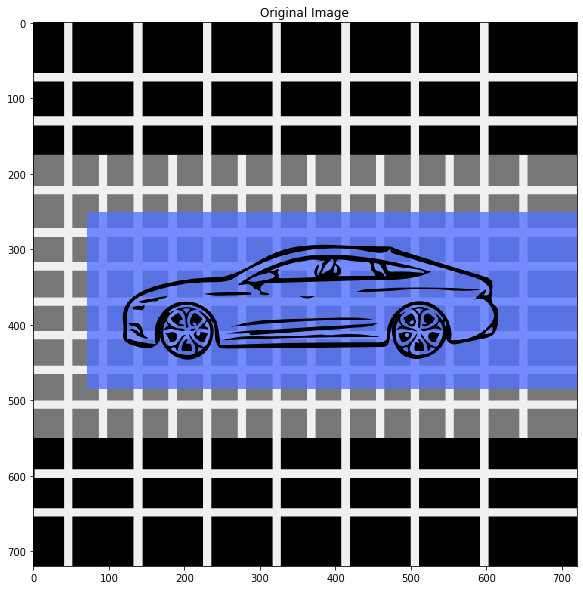

In [8]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

In [10]:
imageB, imageG, imageR = np.moveaxis(image, 2, 0)

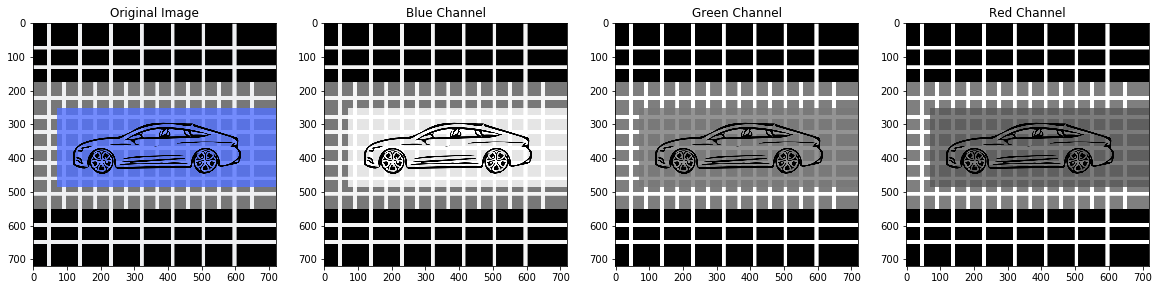

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

In [82]:
thresh = 115
maxValue = 255
src = imageB

th, dst_bin = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)

Text(0.5, 1.0, 'Threshold Binary')

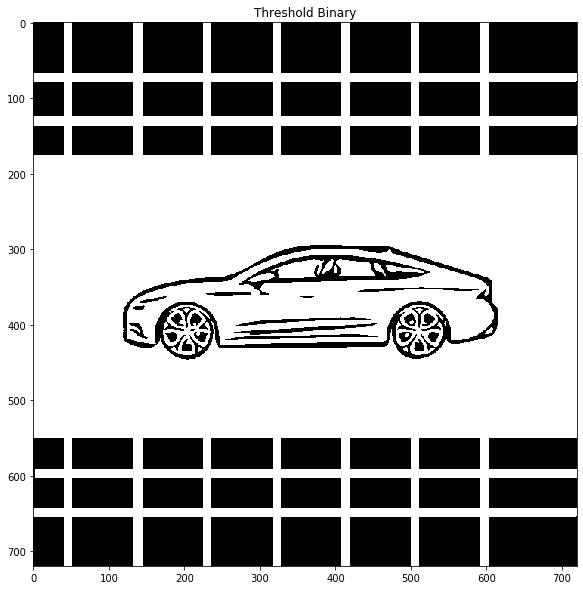

In [83]:
plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255)
plt.title("Threshold Binary")

In [84]:
kSize5 = (5,5)
kSize11 = (11,11)
kSize23 = (23,23)
kSize45 = (45,45)
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize5)
kernel11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize11)
kernel23 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize23)
kernel45 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize45)

In [85]:
imageEroded1 = cv2.erode(dst_bin, kernel23, iterations=3)
imageDilated1 = cv2.dilate(imageEroded1, kernel23, iterations=3)

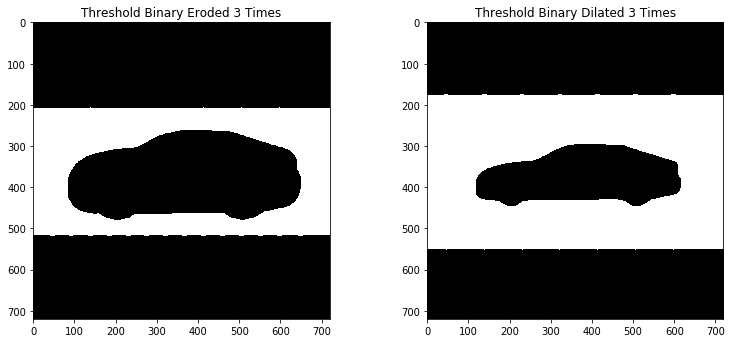

In [86]:
plt.figure(figsize=[20,12])
plt.subplot(231);plt.imshow(imageEroded1, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Eroded 3 Times");
plt.subplot(232);plt.imshow(imageDilated1, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Dilated 3 Times");

In [87]:
contours, hierarchy = cv2.findContours(imageDilated1, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [88]:
print(len(contours))

2


In [89]:
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    perimeter = cv2.arcLength(contours[i],True)
 
    print("Contour {} has area = {} and perimeter = {}".format(i, area, perimeter))

Contour 0 has area = 55628.5 and perimeter = 1193.6538895368576
Contour 1 has area = 268458.0 and perimeter = 2212.9949476718903


Text(0.5, 1.0, 'Image With All Contours Detected')

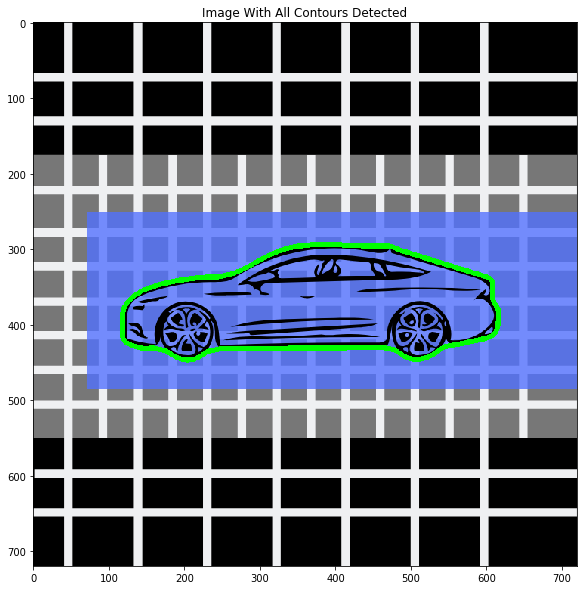

In [90]:
image_c = image.copy()
cv2.drawContours(image_c, contours, 0, (0,255,0), 5)
plt.imshow(image_c[:,:,::-1])
plt.title("Image With All Contours Detected")